# Comparing learning reates :

in this part we will use gradient descent with housing prices data to compare different learning rates by visualizing cost function with number of iterations.

First we will use `pandas` to read and exploar data :

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dataset = pd.read_csv('ex1data2.txt', names=['size', 'bedrooms', 'price'])
print(dataset.head())
print(dataset.shape)

   size  bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
(47, 3)


**Note** we have two features (size and bedrooms),  house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

- we will use this steps to normalize our data :  
  - Subtract the mean value of each feature from the dataset.
  - After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.


In [2]:
features = np.array(dataset[['size', 'bedrooms']])
label = np.array(dataset['price'])

mu = np.mean(features, axis=0)
x_norm = np.subtract(features, mu)
sigma = np.std(features, axis=0)
x_norm = np.divide(x_norm, sigma)

print(x_norm[:5, :])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


After normalizing our data now all features have similar range of values. 

now we will implement gradient descent class and use it to compare different learning rates

this class has two methods plus init to initialize the NO.iterations :

1- fit : this method takes features, labels, alpha and initial theta values to optimize theta values

These are the values you will adjust to minimize cost.

first we will add another dimension to our data to accommodate the theta0 intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

then we will compute the cost

J = (1 / 2m) ∑ (y' - y) ^ 2

m is the number of examples in our data

y' is the predicted value

last step we will use gradient in gradient descent to change theta values

for each theta we will compute the cost and save it in j_history dictionary

then we will iterate through j_history dictionary and choose theta values with the least cost function

we will save it to make prediction !

and we will save cost values for each alpha to visualize cost with iterations. 

2- predict

this method predict the profit value for given population

In [3]:
class GradientDescent:
    def __init__(self, iterations=1500):
        self.iter = iterations

    def fit(self, features, label, alpha=0.01, theta=None):
        
        # initialize theta values :
        if theta is None:
            theta = np.zeros((1, features.shape[1] + 1),
                             dtype='float64')
        else:
            theta = theta
        
        self.label = label 
        self.features = features
        self.alpha = alpha
       
        # add ones column to features
        x = np.concatenate([np.ones((self.features.shape[0], 1),
                                    dtype='float64'),
                            features], axis=1)
        
        m = features.shape[0]

        def cost(x, m, label, theta):
            prediction = np.dot(x, theta.transpose())
            sqr_error = [(y_pre - y) ** 2 
                         for y_pre, y in zip(prediction, label)]
            J = (1 / (2 * m) * sum(sqr_error))
            return J[0]
        
        self.j_hist = {}
        for _ in range(self.iter):
            prediction = np.dot(x, theta.transpose())
            error = np.array([(y_pre - y)
                              for y_pre, y in zip(prediction, label)])
            gradient = np.dot(error.transpose(), x)
            theta = theta - alpha * (1 / m) * gradient
            j = cost(x, m, label, theta)
            self.j_hist[j] = theta
        
        self.min_j = min([i for i in self.j_hist])
        self.theta = self.j_hist[self.min_j]
        # save costs found by this learning rate
        self.costs = [i for i in self.j_hist]
        
    def predict(self, feature):
        self.feature = feature
        x = np.concatenate([np.ones((self.feature.shape[0], 1),
                                    dtype='float64'),
                            feature], axis=1)
        return np.dot(x, self.theta.transpose())

**Now**  we will creat list with different alpha values and use each value with number of iterations

then we will plot cost function for each alpha and compare them to find learning rate that converge quickly

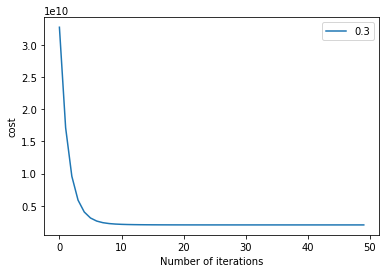

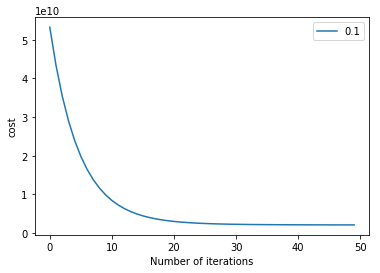

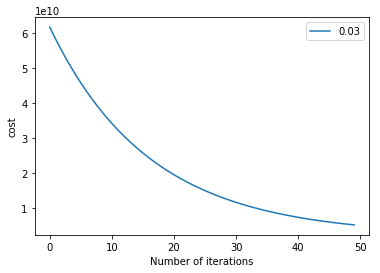

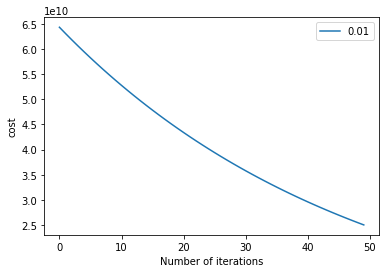

In [4]:
alpha = [0.3, 0.1, 0.03, 0.01]
for ele in alpha:
    model = GradientDescent(iterations=50)
    model.fit(x_norm, label, alpha=ele)
    cost = model.costs
    plt.plot(range(model.iter), cost, label=str(ele))
    plt.xlabel('Number of iterations')
    plt.ylabel('cost')
    plt.legend()
    plt.show()

**Note** gradient descent decreases for all learning rates, tough it's too slow for value of 0.3 and it takes more time to converge 
